In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,Input

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:

data.drop("customerID", axis=1, inplace=True)


data["Churn"] = data["Churn"].map({"Yes":1, "No":0})


data = pd.get_dummies(data, drop_first=True)


In [ ]:
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
model=Sequential(
    [
        Dense(64,activation="relu",input_dim=X_train.shape[1]),
        Dropout(0.2),
        Dense(32,activation="relu"),
        Dropout(0.2),
        Dense(1,activation="sigmoid")

    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x=X_train,y=y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6580 - loss: 0.6509 - val_accuracy: 0.7613 - val_loss: 0.4617
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8702 - loss: 0.3076 - val_accuracy: 0.7480 - val_loss: 0.4880
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9704 - loss: 0.0937 - val_accuracy: 0.7533 - val_loss: 0.5374
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9843 - loss: 0.0433 - val_accuracy: 0.7409 - val_loss: 0.6037
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9842 - loss: 0.0341 - val_accuracy: 0.7391 - val_loss: 0.6735
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9844 - loss: 0.0318 - val_accuracy: 0.7214 - val_loss: 0.7657
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9879 - loss: 0.0246 - val_accuracy: 0.7161 - val_loss: 0.7892
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9857 - loss: 0.0283 - val_accu

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 0.9381
Test Accuracy: 0.7700496912002563


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(y_pred[:10])   # show first 10 predictions


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       419,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,861 (4.83 MB)

 Trainable params: 421,953 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,908 (3.22 MB)

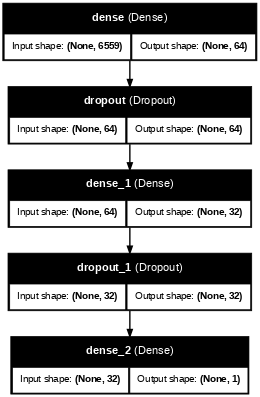

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,
           to_file='ann_structure.png',
           show_shapes=True,
           show_layer_names=True ,  dpi=50,
    rankdir='TB')
